>Nama : Sarah Salsabila

>Kelas: Data Ranger

>Email: ssalsabila551@gmail.com

###<center>NLP WEEK 6 TASK 2.1

In [ ]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
!pip install Sastrawi

print('Done Sarah!')

     |████████████████████████████████| 209 kB 5.4 MB/s 
Done Sarah!


In [ ]:
#mengambil data
data = '/content/drive/MyDrive/Orbit Future Academy /Week 6/NLP/task 2.1/20191002-reviews.csv'
review_brng = pd.read_csv(data)
review_brng

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203782,9467899,shop-televisi-digital,Isharyanto S.,5,NaN,murah,barang bagus dengan harga kompetitif,6,6,0,True,24.63,22 Nov 2016,desktop,2019-10-02
203783,9467899,shop-televisi-digital,FIRLY B.,3,NaN,barang bagus dan sesuai pesanan,NaN,0,0,0,True,14.01,10 Apr 2018,androidApp,2019-10-02
203784,9548087,shop-televisi-digital,soni s.,5,NaN,NaN,NaN,0,0,0,True,15.63,04 Jan 2018,androidApp,2019-10-02
203785,9548767,shop-televisi-digital,Saidhusin H.,3,NaN,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,0,0,0,True,19.48,15 Nov 2016,mobile-app,2019-10-02


In [ ]:
review_brng.columns
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

Index(['itemId', 'category', 'name', 'rating', 'originalRating', 'reviewTitle',
       'reviewContent', 'likeCount', 'upVotes', 'downVotes', 'helpful',
       'relevanceScore', 'boughtDate', 'clientType', 'retrievedDate'],
      dtype='object')

In [ ]:
reviewyuk =  pd.concat([review_brng.reviewContent,review_brng.rating],axis = 1)
reviewyuk.head()

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
4,NaN,5


In [ ]:
reviewyuk.shape

(203787, 2)

In [ ]:
reviewyuk.describe()

,rating
count,203787.000000
mean,4.603238
std,0.991164
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
reviewyuk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewContent  107029 non-null  object
 1   rating         203787 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
reviewyuk.isnull().sum()
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

reviewContent    96758
rating               0
dtype: int64

In [ ]:
reviewyuk.dropna(axis=0,inplace=True)
reviewyuk

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
7,bima,1
...,...,...
203780,Wkwkwk,5
203781,seller incapable to keep his product page clea...,1
203782,barang bagus dengan harga kompetitif,5
203785,Ok.thank lazada Pagi order sore barang nyampe ...,3


In [ ]:
print(reviewyuk.isnull().sum())
reviewyuk.shape

reviewContent    0
rating           0
dtype: int64


(107029, 2)

In [ ]:
reviewyuk.rating.value_counts()

5    82896
4    10626
1     6951
3     4372
2     2184
Name: rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


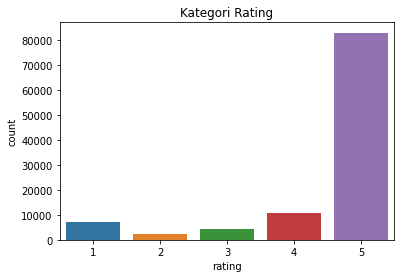

In [ ]:
plt.title('Kategori Rating')
sns.countplot(reviewyuk.rating)

In [ ]:
reviewyak = reviewyuk.head(5000)
reviewyak

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
7,bima,1
...,...,...
10224,"Barang sesuai dengan deskripsi, bonus sesuai d...",5
10225,Thanks to Lazada. Barangnya sesuai pesanan. Aq...,5
10226,"Barang sampai di tujuan dengan cepat, packing ...",5
10227,sejauh ini bagus tpi belo dala jagka waktu yan...,3


In [ ]:
reviewyak.duplicated(subset=['reviewContent']).sum()

376

In [ ]:
reviewyak.drop_duplicates(subset=['reviewContent'])

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
7,bima,1
...,...,...
10224,"Barang sesuai dengan deskripsi, bonus sesuai d...",5
10225,Thanks to Lazada. Barangnya sesuai pesanan. Aq...,5
10226,"Barang sampai di tujuan dengan cepat, packing ...",5
10227,sejauh ini bagus tpi belo dala jagka waktu yan...,3


In [ ]:
print('Jumlah Review dengan rating 1 : ', len(reviewyak.loc[reviewyak['rating'] == 1]))
print('Jumlah Review dengan rating 2 : ', len(reviewyak.loc[reviewyak['rating'] == 2]))
print('Jumlah Review dengan rating 3 : ', len(reviewyak.loc[reviewyak['rating'] == 3]))
print('Jumlah Review dengan rating 4 : ', len(reviewyak.loc[reviewyak['rating'] == 4]))
print('Jumlah Review dengan rating 5 : ', len(reviewyak.loc[reviewyak['rating'] == 5]))

Jumlah Review dengan rating 1 :  378
Jumlah Review dengan rating 2 :  115
Jumlah Review dengan rating 3 :  256
Jumlah Review dengan rating 4 :  682
Jumlah Review dengan rating 5 :  3569


In [ ]:
print(reviewyak.rating.unique())
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

[5 4 1 3 2]


In [ ]:
def casefolding(reviewContent):
  reviewContent = reviewContent.lower()                               # Mengubah teks menjadi lower case
  reviewContent = re.sub(r'https?://\S+|www\.\S+', '', reviewContent) # Menghapus URL
  reviewContent = re.sub(r'[-+]?[0-9]+', '', reviewContent)           # Menghapus angka
  reviewContent = re.sub(r'[^\w\s]','', reviewContent)        # Menghapus karakter tanda baca
  reviewContent = re.sub(r' +', ' ', reviewContent)                   # White space
  reviewContent = reviewContent.strip()
  return reviewContent

In [ ]:
reviewyuk['reviewContent']

0                           bagus  mantap dah sesui pesanan
1                                        Bagus, sesuai foto
2                          okkkkk mantaaaaaaapppp ... goood
3                                              bagus sesuai
7                                                      bima
                                ...                        
203780                                               Wkwkwk
203781    seller incapable to keep his product page clea...
203782                 barang bagus dengan harga kompetitif
203785    Ok.thank lazada Pagi order sore barang nyampe ...
203786    semua fitur berfungsi,harganya cukup murah. AK...
Name: reviewContent, Length: 107029, dtype: object

In [ ]:
reviewyak['reviewContent'].iloc[11]

'Bagaimana tv LED saya merek Sharp 24 hitam LC 24LE170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya ,, so,alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih!!!'

In [ ]:
review_11 = reviewyak['reviewContent'].iloc[11]
x_11 = casefolding(review_11)
x_11

'bagaimana tv led saya merek sharp hitam lc lei sekarang mati total baru bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya soalnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih'

In [ ]:
x_11.split()

['bagaimana',
 'tv',
 'led',
 'saya',
 'merek',
 'sharp',
 'hitam',
 'lc',
 'lei',
 'sekarang',
 'mati',
 'total',
 'baru',
 'bln',
 'kemana',
 'saya',
 'harus',
 'menghubungi',
 'dan',
 'meminta',
 'bantuan',
 'mohon',
 'kebijakan',
 'dan',
 'solusinya',
 'soalnya',
 'masih',
 'garansi',
 'kepada',
 'pihak',
 'lazada',
 'saya',
 'mohon',
 'bantuannya',
 'terimakasih']

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_ind = stopwords.words('indonesian')
stopwords_ind
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
len(stopwords_ind)

758

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
sw_ind = stop_factory.get_stop_words()
sw_ind #load stopword list bahasa indonesia

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

In [ ]:
len(sw_ind)

126

In [ ]:
stopwordsind = stopwords_ind + sw_ind

In [ ]:
#stopword
def remove_stopword(reviewContent) :
  clean_review = []
  reviewContent = reviewContent.split()
  for i in reviewContent :
    if i not in stopwordsind:
      clean_review.append(i)
  return " ".join(clean_review)

In [ ]:
x_11

'bagaimana tv led saya merek sharp hitam lc lei sekarang mati total baru bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya soalnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih'

In [ ]:
x_11_sw = remove_stopword(x_11)
x_11_sw

'tv led merek sharp hitam lc lei mati total bln menghubungi bantuan mohon kebijakan solusinya garansi lazada mohon bantuannya terimakasih'

In [ ]:
#stemming dan Lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer_factory = StemmerFactory()
ina_stemmer = stemmer_factory.create_stemmer()

In [ ]:
def stemming(reviewContent):
  reviewContent = ina_stemmer.stem(reviewContent)
  return reviewContent 
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

In [ ]:
stemming(x_11_sw)

'tv led merek sharp hitam lc lei mati total bln hubung bantu mohon bijak solusi garansi lazada mohon bantu terimakasih'

In [ ]:
kamus_normalisasi = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
kamus_normalisasi.head(5)

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi


In [ ]:
def normalisasi(reviewContent):
  reviewContent = ' '.join([kamus_normalisasi[kamus_normalisasi['singkat'] == word]['hasil'].values[0] if (kamus_normalisasi['singkat'] == word).any() else word for word in reviewContent.split()])
  return reviewContent

In [ ]:
normalisasi('bln')

'bulan'

In [ ]:
def preprocessing(reviewContent):
  reviewContent = casefolding(reviewContent)
  reviewContent = remove_stopword(reviewContent)
  reviewContent = stemming(reviewContent)
  reviewContent = normalisasi(reviewContent)
  return reviewContent

In [ ]:
preprocessing(x_11)

'televisi led merek sharp hitam lc lei mati total bulan hubung bantu mohon bijak solusi garansi lazada mohon bantu terimakasih'

In [ ]:
%%time
reviewyak['clean'] = reviewyak['reviewContent'].apply(preprocessing)

CPU times: user 10min 26s, sys: 3.89 s, total: 10min 30s
Wall time: 10min 47s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
reviewyak
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

,reviewContent,rating,clean
0,bagus mantap dah sesui pesanan,5,bagus mantap sudah sesui pesan
1,"Bagus, sesuai foto",4,bagus sesuai foto
2,okkkkk mantaaaaaaapppp ... goood,5,okkkkk mantaaaaaaapppp goood
3,bagus sesuai,4,bagus sesuai
7,bima,1,bima
...,...,...,...
10224,"Barang sesuai dengan deskripsi, bonus sesuai d...",5,barang sesuai deskripsi bonus sesuai kirim cep...
10225,Thanks to Lazada. Barangnya sesuai pesanan. Aq...,5,terimakasih untuk lazada barang sesuai pesan s...
10226,"Barang sampai di tujuan dengan cepat, packing ...",5,barang tuju cepat packing rapi barang sesuai d...
10227,sejauh ini bagus tpi belo dala jagka waktu yan...,3,bagus tapi belo dala jagka tunggu sapai at lea...


In [ ]:
len(reviewyak)

5000

In [ ]:
reviewyak.isnull().sum()

reviewContent    0
rating           0
clean            0
dtype: int64

In [ ]:
reviewyak.to_csv('/content/drive/MyDrive/Orbit Future Academy /Week 6/NLP/task 2.1/review_clean.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [ ]:
X = reviewyak.clean
y = reviewyak.rating

In [ ]:
vec_uni = CountVectorizer(ngram_range=(1,1))
vec_uni.fit(X)

CountVectorizer()

In [ ]:
print(len(vec_uni.get_feature_names_out()))

4658


In [ ]:
print(vec_uni.get_feature_names_out())

['ababila' 'abal' 'abang' ... 'zonk' 'zs' 'zuma']


In [ ]:
vec_Bi = CountVectorizer(ngram_range=(2,2))
vec_Bi.fit(X)
print(vec_Bi.get_feature_names_out())

['ababila hanphone' 'abal abal' 'abal file' ... 'zippernya kecewa'
 'zonk deeh' 'zs samsung']


In [ ]:
print(len(vec_Bi.get_feature_names_out()))
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

18939


In [ ]:
#ubah dalam bentuk array
X_unigram = vec_uni.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#unigram
data_unigram = pd.DataFrame(X_unigram, columns=vec_uni.get_feature_names_out())
data_unigram

,ababila,abal,abang,abizzzx,acara,accessories,aceh,acer,activation,activationnyacode,...,yya,zada,zeb,zenfone,zipper,zippernya,zone,zonk,zs,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#ubah dalam bentuk array
X_bigram = vec_Bi.transform(X).toarray()

#Bigram
data_bigram = pd.DataFrame(X_bigram, columns=vec_Bi.get_feature_names_out())
data_bigram

,ababila hanphone,abal abal,abal file,abal lagibaguslahmksh,abal lazada,abal nih,abang gojek,abang kurir,acara yang,accessories lengkap,...,youtube juga,youtube situs,youtube via,yya ada,zeb pesan,zenfone bahan,zipper nya,zippernya kecewa,zonk deeh,zs samsung
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
reviewyak[reviewyak['clean'].str.contains('bagus')]
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

,reviewContent,rating,clean
0,bagus mantap dah sesui pesanan,5,bagus mantap sudah sesui pesan
1,"Bagus, sesuai foto",4,bagus sesuai foto
3,bagus sesuai,4,bagus sesuai
22,barang sudah sampai dan bagus thanks lazada,5,barang bagus terimakasih lazada
42,"Barang Ok, kualitas bagus dengan harga yg cuku...",5,barang kualitas bagus harga yang miring kualit...
...,...,...,...
10216,"Pengiriman cepat, bonus lengkap, performa bagu...",4,kirim cepat bonus lengkap performa bagus sayan...
10221,"Saya kasih bintang 5. Proses cepat, packing ba...",5,kasih bintang proses cepat packing bagus bonus...
10223,"ini baru seller top markotop,pengiriman sangat...",5,penjual top markotoppengiriman cepatbarang bag...
10225,Thanks to Lazada. Barangnya sesuai pesanan. Aq...,5,terimakasih untuk lazada barang sesuai pesan s...


In [ ]:
len(reviewyak[reviewyak['clean'].str.contains('bagus')])

1202

In [ ]:
pd.Series(' '.join(reviewyak.reviewContent).split()).value_counts()

barang             1190
dan                1178
sesuai              994
Barang              752
dengan              720
                   ... 
top,                  1
expess                1
oke..Windowsnya       1
okee..                1
Maju                  1
Length: 10600, dtype: int64

In [ ]:
pd.Series(' '.join(reviewyak.clean).split()).value_counts()

barang       2399
bagus        1156
sesuai       1146
cepat         983
kirim         876
             ... 
copak           1
yahut           1
nyathanks       1
aip             1
lacar           1
Length: 4680, dtype: int64

In [ ]:
def frekuensi_kata(reviewContent):
  kalimat = []
  for i in reviewContent:
    kalimat.append(i)
  return ' '.join(kalimat)

In [ ]:
corpus_clean = frekuensi_kata(reviewyak.clean)
corpus = frekuensi_kata(reviewyak.reviewContent)

In [ ]:
from wordcloud import WordCloud

In [ ]:
frek_clean = WordCloud().process_text(corpus_clean)
frek = WordCloud().process_text(corpus)
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

In [ ]:
def sort_dict_by_value(d, reverse = True):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

In [ ]:
print(sort_dict_by_value(frek))

{'dan': 707, 'yg': 350, 'saya': 323, 'nya': 305, 'barang bagus': 296, 'tapi': 291, 'bagus': 288, 'pengiriman cepat': 274, 'ini': 271, 'barang sesuai': 258, 'mantap': 250, 'yang': 247, 'barangnya': 239, 'Terima kasih': 228, 'di': 218, 'dengan baik': 216, 'untuk': 210, 'sesuai dengan': 207, 'tidak': 198, 'ok': 193, 'barang': 183, 'Barang sudah': 183, 'juga': 182, 'pengiriman': 179, 'thank': 179, 'produk': 171, 'ya': 169, 'sesuai pesanan': 157, 'good': 153, 'buat': 151, 'seller': 145, 'harga': 135, 'lazada': 134, 'bagus dan': 133, 'ga': 131, 'packing rapi': 131, 'sesuai deskripsi': 128, 'gak': 126, 'ada': 125, 'bisa': 125, 'berfungsi dengan': 124, 'tp': 122, 'sudah sampai': 118, 'baru': 116, 'lama': 116, 'bagus sesuai': 112, 'beli': 111, 'sangat': 111, 'semoga awet': 111, 'gan': 108, 'cuma': 108, 'ke': 105, 'lagi': 105, 'banget': 102, 'cepat sampai': 99, 'bonus': 97, 'kualitas': 96, 'oke': 96, 'jg': 96, 'sampe': 95, 'sama': 95, 'hari': 93, 'sudah diterima': 92, 'thanks lazada': 91, 'semog

In [ ]:
vec_tfidf_uni = TfidfVectorizer(ngram_range=(1,1))
vec_tfidf_uni.fit(X)

TfidfVectorizer()

In [ ]:
print(vec_tfidf_uni.get_feature_names_out())

['ababila' 'abal' 'abang' ... 'zonk' 'zs' 'zuma']


In [ ]:
#ubah dalam bentuk array
X_unigram_tfidf = vec_tfidf_uni.transform(X).toarray()

#Unigram
data_unigram_tfidf = pd.DataFrame(X_unigram_tfidf, columns=vec_tfidf_uni.get_feature_names_out())
data_unigram_tfidf

,ababila,abal,abang,abizzzx,acara,accessories,aceh,acer,activation,activationnyacode,...,yya,zada,zeb,zenfone,zipper,zippernya,zone,zonk,zs,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vec_tfidf_bi = TfidfVectorizer(ngram_range=(2,2))
vec_tfidf_bi.fit(X)

#ubah dalam bentuk array
X_bigram_tfidf = vec_tfidf_bi.transform(X).toarray()

#Bigram
data_bigram_tfidf = pd.DataFrame(X_bigram_tfidf, columns=vec_tfidf_bi.get_feature_names_out())
data_bigram_tfidf
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

,ababila hanphone,abal abal,abal file,abal lagibaguslahmksh,abal lazada,abal nih,abang gojek,abang kurir,acara yang,accessories lengkap,...,youtube juga,youtube situs,youtube via,yya ada,zeb pesan,zenfone bahan,zipper nya,zippernya kecewa,zonk deeh,zs samsung
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_baru = np.array(data_unigram_tfidf)
y_rating = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi2_features = SelectKBest(chi2, k = 1000)
X_kbest_features = chi2_features.fit_transform(X_baru, y_rating)

In [ ]:
print('Original feature number:', X_baru.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 4658
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['rating'])
Data

,rating
0,2.779019
1,6.860474
2,2.156298
3,0.346109
4,2.792928
...,...
4653,10.664959
4654,2.683757
4655,0.127111
4656,0.115594


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['rating'])
Data

,rating
0,2.779019
1,6.860474
2,2.156298
3,0.346109
4,2.792928
...,...
4653,10.664959
4654,2.683757
4655,0.127111
4656,0.115594


In [ ]:
#Menampilkan fitur beserta nilainya
feature =vec_tfidf_uni.get_feature_names()
feature

Data['review'] = feature
Data
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,rating,review
0,2.779019,ababila
1,6.860474,abal
2,2.156298,abang
3,0.346109,abizzzx
4,2.792928,acara
...,...,...
4653,10.664959,zippernya
4654,2.683757,zone
4655,0.127111,zonk
4656,0.115594,zs


In [ ]:
#Mengurutkan fitur terbaik
Data.sort_values(by='rating', ascending=False)

,rating,review
4285,87.269104,tidak
3611,57.901712,rusak
235,54.202068,bagaimana
1852,49.320805,jelek
1737,48.811866,inch
...,...,...
726,0.046795,capacitynya
3162,0.046795,pemakaianhasil
4467,0.046795,unuk
2532,0.046795,mari


In [ ]:
mask =chi2_features.get_support()
mask

array([False,  True, False, ..., False, False, False])

In [ ]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['abal',
 'activationnyacode',
 'agak',
 'agustus',
 'ahaa',
 'ajj',
 'aju',
 'aktivasi',
 'aktivasitaapi',
 'akun',
 'akur',
 'alamat',
 'alas',
 'alat',
 'alesan',
 'alhasil',
 'alhmdlh',
 'aman',
 'amin',
 'aminn',
 'ampas',
 'aneh',
 'anter',
 'antivirus',
 'antivirusnya',
 'ap',
 'apadah',
 'apkah',
 'aqua',
 'aquanya',
 'arah',
 'arduino',
 'asalamualaikum',
 'aspal',
 'asuuu',
 'auto',
 'available',
 'awet',
 'awetawetnya',
 'ba',
 'bab',
 'babakan',
 'baca',
 'back',
 'backpack',
 'bagaimana',
 'bagis',
 'bagus',
 'baguscm',
 'bagusharga',
 'baguskalo',
 'bagusthx',
 'bal',
 'balikin',
 'bandung',
 'banget',
 'bangetbarang',
 'bangetkirain',
 'bangkrut',
 'bank',
 'baracuda',
 'baran',
 'barang',
 'barangny',
 'barangnyacma',
 'barangx',
 'basic',
 'basics',
 'bata',
 'batal',
 'batalin',
 'batalkn',
 'batas',
 'baut',
 'bayar',
 'bca',
 'be',
 'beda',
 'beep',
 'begitu',
 'bekas',
 'beli',
 'belo',
 'belum',
 'benar',
 'bener',
 'beneran',
 'benget',
 'bengkulu',
 'berapa',
 '

In [ ]:
new_feature

In [ ]:
data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,abal,activationnyacode,agak,agustus,ahaa,ajj,aju,aktivasi,aktivasitaapi,akun,...,yacc,yah,yahik,yang,yapersyaratan,yaudalah,yeee,yet,ygcabang,zippernya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108493,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pickle

In [ ]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(data_selected_feature,open("selected_feature_tf-idf.pkl","wb"))

In [ ]:
import cv2

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-04-03 16:48:29--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.002s  

2022-04-03 16:48:29 (14.0 MB/s) - ‘cloud.jpg’ saved [34396/34396]



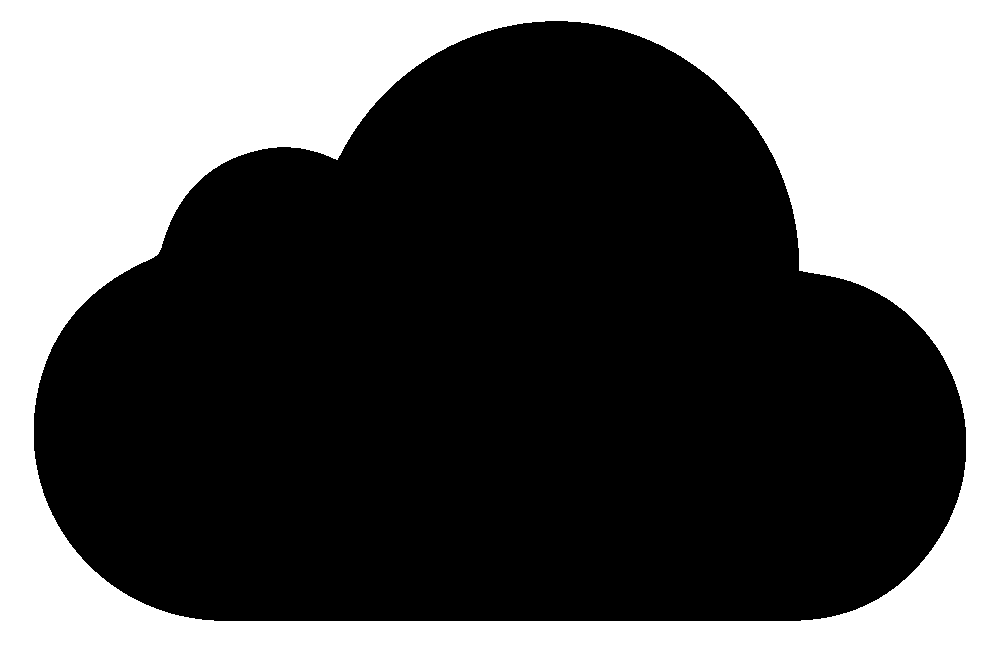

In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

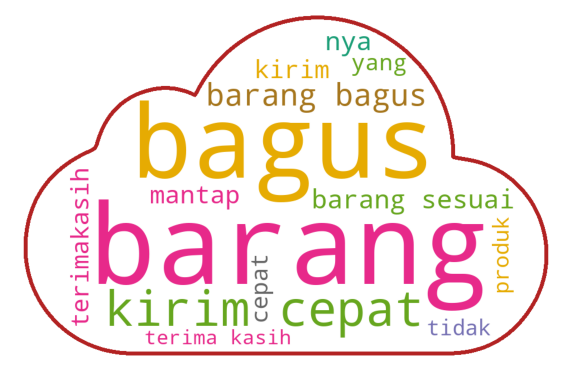

In [ ]:
# WordCloud Label rating 5

review = reviewyak[reviewyak.rating == 5]
normal_string = []

for t in review.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

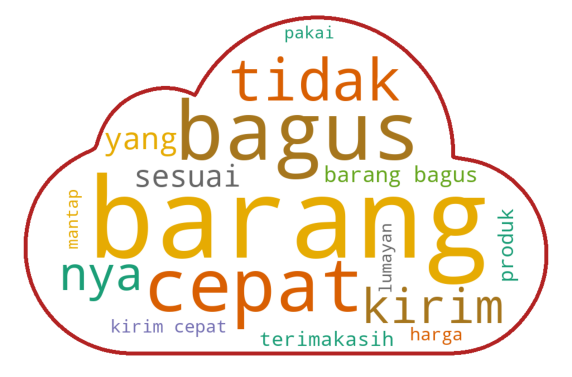

In [ ]:
rating = reviewyak[reviewyak.rating == 4]
normal_string = []

for t in rating.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

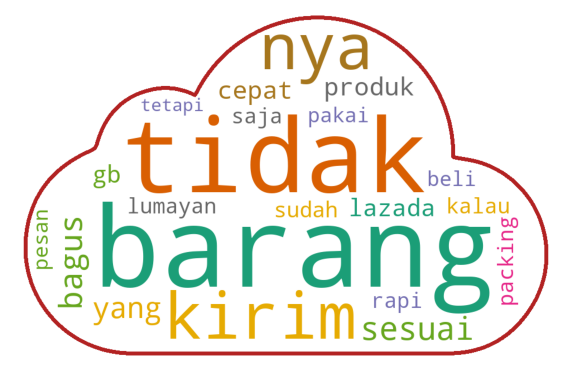

In [ ]:
# WordCloud Label rating 3

review3 = reviewyak[reviewyak.rating == 3]
normal_string = []

for t in review3.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

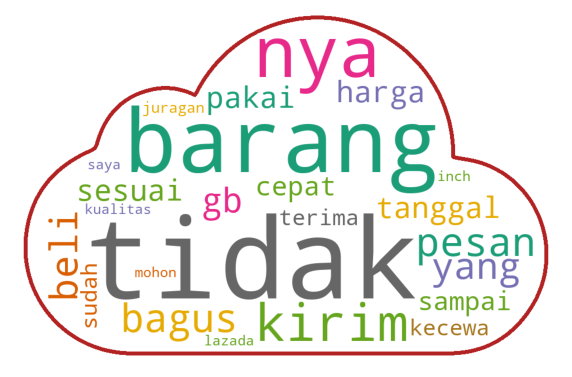

In [ ]:
rating = reviewyak[reviewyak.rating == 2]
normal_string = []

for t in rating.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

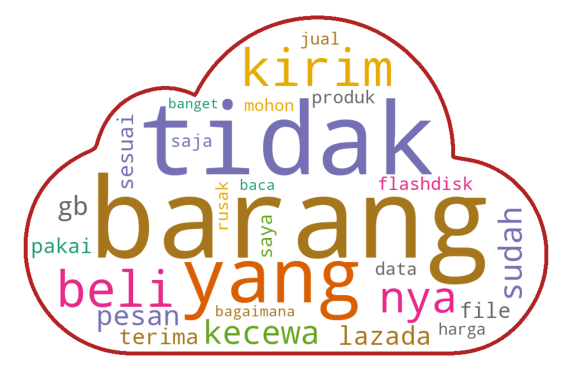

In [ ]:
rating = reviewyak[reviewyak.rating == 1]
normal_string = []

for t in rating.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
print('DONE SARAH!')

DONE SARAH!


In [ ]:
#import library
from sklearn import svm #model support vector machine
from sklearn.naive_bayes import MultinomialNB #multinomial naive bayes
from sklearn.model_selection import train_test_split
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)
import random


In [ ]:
# tentukan X dan y
X = data_selected_feature
y = reviewyak.rating

In [ ]:
#train test split data
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state = 0)

In [ ]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritma fitting

text_algorithm = MultinomialNB()
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

Duration: 0:00:00.035146


In [ ]:
#prediksi

prediksi = model.predict(x_test)

prediksi

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [ ]:
#evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           1       0.67      0.02      0.04        87
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00       147
           5       0.68      1.00      0.81       678

    accuracy                           0.68      1000
   macro avg       0.27      0.20      0.17      1000
weighted avg       0.52      0.68      0.55      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


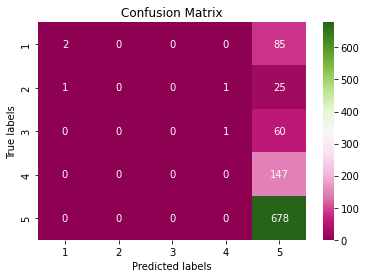

In [ ]:
import seaborn as sns
ax= plt.subplot()

CM = confusion_matrix(y_test, prediksi)

sns.heatmap(CM, annot=True, cmap="PiYG",fmt='g', ax=ax)
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5']); ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5']);

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
score = np.mean(accuracy)

print("accuracy", accuracy)
print("score accuracy", score)

accuracy [0.721 0.713 0.748 0.721 0.732 0.726 0.711 0.728 0.71  0.689]
score accuracy 0.7199


In [ ]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_naive.joblib")

data_input = input("Masukkan sentiment:\n")
#scrapping

data_input = preprocessing(data_input)

#Load
tfidf = TfidfVectorizer
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if hasil == 1:
  print("Review buruk")
elif hasil == 2:
  print("Review kurang baik")
elif hasil == 3:
  print("Review baik")
elif hasil == 4:
  print("Review bagus")
elif hasil == 5:
  print("Review sangat bagus")

print("Hasil prediksi:\n", hasil)

Masukkan sentiment:
saya senang sekali
Review sangat bagus
Hasil prediksi:
 [5]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"
